In [42]:
import numpy
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import matplotlib.pyplot as plt

In [14]:
# 이번 튜토리얼에서 사용할 데이터를 가져온다.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(archive),'flower_photos')


In [22]:
# 이미지가 총 몇개인지 확인해본다.
image_count = len(glob.glob(os.path.join(data_dir,'*/*.jpg')))
print(image_count)

3670


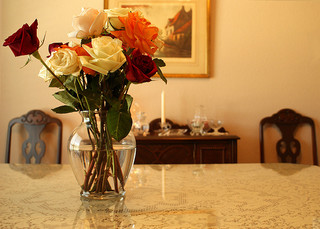

In [29]:
# 이미지를 하나 불러와서 띄워본다.
roses = list(glob.glob(os.path.join(data_dir,'roses/*')))
PIL.Image.open(str(roses[0]))

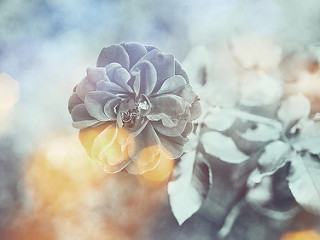

In [35]:
PIL.Image.open(roses[2])

## Load data using a keras utility

In [39]:
# batch_size 및 학습에 사용할 이미지의 크기를 지정해준다. 
batch_size = 32
img_height = 180
img_width = 180

# 케라스 api를 활용해 디렉토리별로 분류하여 데이터셋을 만든다.
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 2023,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [40]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 2023,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [41]:
# 사진이 들어있던 폴더명이 클래스로 저장되어있다.
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


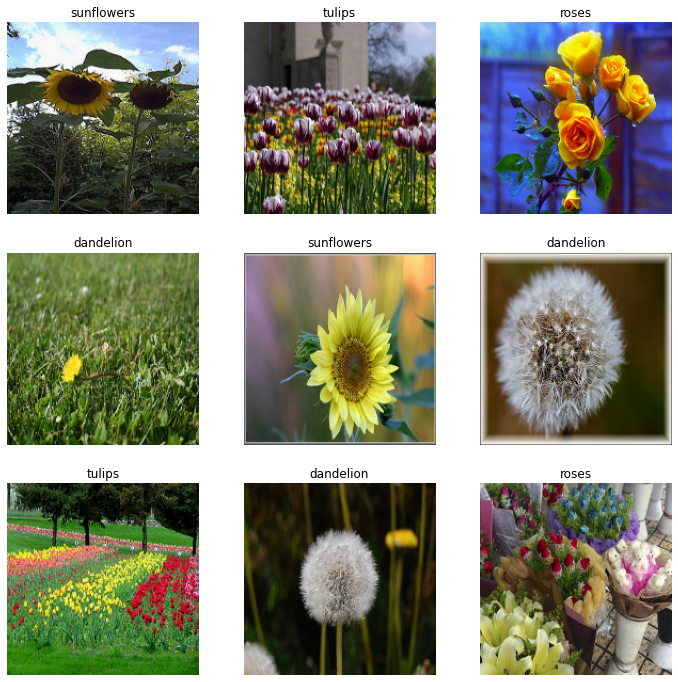

In [47]:
# train데이터에 이미지가 잘 데이터셋화 되었는지 일부 확인해본다.
plt.figure(figsize =(12,12))
for img, label in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')
plt.show()

In [48]:
# 배치내의 shape이 의도한 것과 같은지 확인해본다.
for img_batch, label_batch in train_ds:
    print(img_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32,)
